In [3]:
import polarization as plr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Shared configuration for the simulation
num_agents = plr.NUM_AGENTS
num_bins = plr.NUM_BINS
max_time = 100

In [3]:
simulation = plr.run_simulation(
    plr.build_extreme_beliefs(num_agents),
    plr.build_inf_graph_2_groups_faint(num_agents, 0.7, 0.2),
    max_time,
    num_bins,
    plr.Update.CONFBIAS_SHARP,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
)

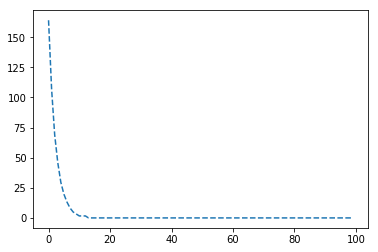

In [4]:
plt.plot(simulation[0], linestyle="dashed")

In [5]:
simulations = {update_type: plr.run_simulation(
    plr.build_extreme_beliefs(num_agents),
    plr.build_inf_graph_2_groups_faint(num_agents, 0.1, 0.5),
    max_time,
    num_bins,
    update_type,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in plr.Update}

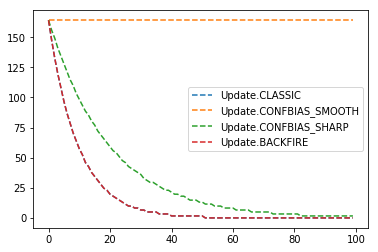

In [6]:
for update_type, values in simulations.items():
    plt.plot(values[0], linestyle="dashed", label=update_type)
plt.legend()

In [7]:
simulations2 = {update_type: plr.run_simulation(
    plr.build_mild_beliefs(num_agents, plr.LOW_POLE, plr.HIGH_POLE, plr.BELIEF_STEP),
    plr.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    150,
    num_bins,
    update_type,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in plr.Update}

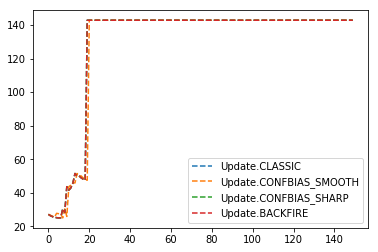

In [8]:
for update_type, values in simulations2.items():
    plt.plot(values[0], linestyle="dashed", label=update_type)
plt.legend()

In [9]:
sim = plr.run_simulation(
    plr.build_mild_beliefs(num_agents, plr.LOW_POLE, plr.HIGH_POLE, plr.BELIEF_STEP),
    plr.build_inf_graph_2_groups_disconnected(num_agents, 0.5),
    100,
    num_bins,
    plr.Update.BACKFIRE,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD    
)

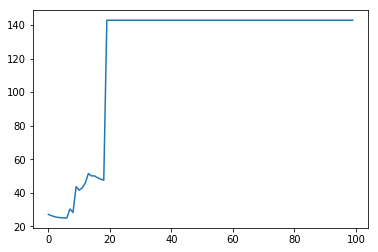

In [10]:
plt.plot(sim[0])

In [11]:
sim[0][99]

142.7825724343806

# Run Simulations

The default parameters are defined as constants in the `polarization.py` module.

- NUM_AGENTS = 100
- LOW_POLE = 0.25
- HIGH_POLE = 0.75
- CONSENSUS_VALUE = 0.5


- NUM_BINS = 201
- ALPHA = 1.6
- K = 1000


- CONFBIAS_DISCOUNT = 0.5
- BACKFIRE_BELIEF_THRESHOLD = 0.4
- BACKFIRE_INFLUENCE_THRESHOLD = 0.2


- CLIQUE_BELIEF_VALUE = 0.5


- GROUPS_DISCONNECTED_BELIEF_VALUE = 0.5


- GROUPS_FAINTLY_BELIEF_VALUE_STRONG = 0.5
- GROUPS_FAINTLY_BELIEF_VALUE_WEAK = 0.1


- INFLUENCERS_BALANCED_OUTGOING_BOTH = 0.6
- INFLUENCERS_BALANCED_INCOMING_BOTH = 0.0
- INFLUENCERS_BALANCED_OTHERS = 0.1


- INFLUENCERS_UNBALANCED_OUTGOING_FIRST = 0.8
- INFLUENCERS_UNBALANCED_OUTGOING_SECOND = 0.5
- INFLUENCERS_UNBALANCED_INCOMING_FIRST = 0.1
- INFLUENCERS_UNBALANCED_INCOMING_SECOND = 0.1
- INFLUENCERS_UNBALANCED_OTHERS = 0.2


In [12]:
pol_history, belief_history = plr.run_simulation(
    plr.build_belief(plr.Belief.MILD),
    plr.build_influence(plr.Influence.GROUP_2_FAINT),
    100,
    num_bins,
    plr.Update.BACKFIRE,
    plr.CONFBIAS_DISCOUNT,
    plr.BACKFIRE_BELIEF_THRESHOLD,
    plr.BACKFIRE_INFLUENCE_THRESHOLD
)

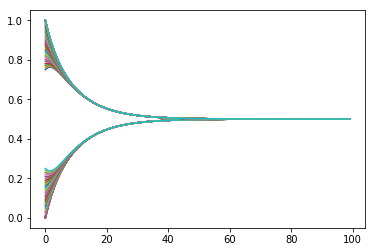

In [13]:
plt.plot(belief_history)
plt.show()

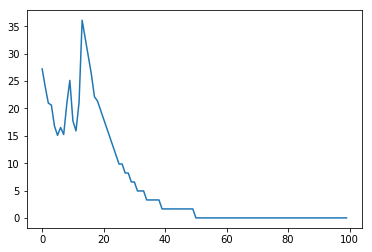

In [14]:
plt.plot(pol_history)

In [15]:
sum(1 if agent > 0.5 else 0 for agent in plr.build_belief(plr.Belief.MILD, 101))

50

In [4]:
num_agents = 3
pol_history, belief_history, _ = plr.run_till_convergence(
    plr.build_belief(plr.Belief.MILD, num_agents, step=0.06),
    plr.build_influence(plr.Influence.CLIQUE, num_agents, general_belief=0.1),
    update_type=plr.Update.CONFBIAS_SMOOTH
)

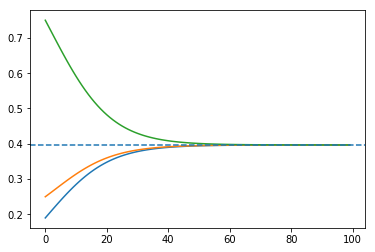

In [5]:
plt.plot(belief_history)
plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.show()

In [20]:
(np.mean(belief_history[0]), max(belief_history[-1]))

(0.5, 0.21000000000000166)

In [77]:
import random
num_agents = 5
inf = np.array([[random.random() if random.random() > 0.9 else 0.0 for _ in range(num_agents)] for _ in range(num_agents)])
# inf[0][-4] = 0.0
pol_history, belief_history, _ = plr.Simulation(
    plr.build_belief(plr.Belief.MILD, num_agents),
    inf # Classic Update by default
).run()

In [88]:
from scipy.sparse.csgraph import connected_components

n_components, labels = connected_components(csgraph=inf, connection="weak")
n_components

1

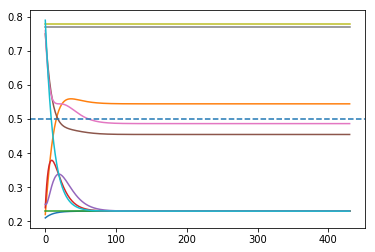

In [89]:
plt.plot(belief_history)
plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.show()

In [3]:
import math
def time_to_converge(epsilon, diff, inf):
    return math.log(epsilon/diff) / math.log(1-inf)

In [12]:
num_agents = 9
pol_history, belief_history, _ = plr.Simulation(
    plr.build_belief(plr.Belief.MILD, num_agents),
    plr.build_influence(plr.Influence.CLIQUE, num_agents) # Classic Update by default
).run()

In [20]:
epsilon = 0.1
t = time_to_converge(epsilon, max(belief_history[0]) - min(belief_history[0]), 0.5)
max(belief_history[2]) - min(belief_history[2])

0.14250000000000002

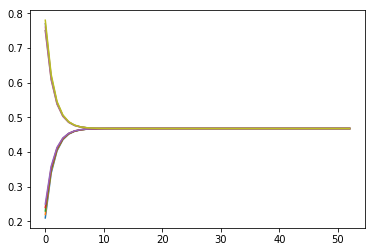

In [21]:
plt.plot(belief_history)
plt.show()

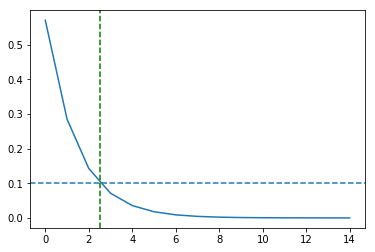

In [37]:
plt.plot([max(belief_step) - min(belief_step) for belief_step in belief_history[:15]])
plt.axhline(epsilon, linestyle="dashed")
plt.axvline(t, color="g", linestyle="dashed")
plt.show()

In [105]:
i = 0.5
inf = np.array([
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, i, i, 0, 0, 0, 0, 0, 0, 0],
    [0, i, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, i, 0, 0, 0, 0, 0],
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, i, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, i, 0, 0, i, 0, 0, 0],
    [0, 0, 0, 0, i, 0, i, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, i, i],
    [0, 0, 0, 0, 0, 0, 0, 0, i, 0, i],
    [0, 0, 0, 0, 0, 0, 0, 0, i, i, 0]
])
pol_history, belief_history, _ = plr.Simulation(plr.build_belief(plr.Belief.UNIFORM, len(inf)), inf).run()

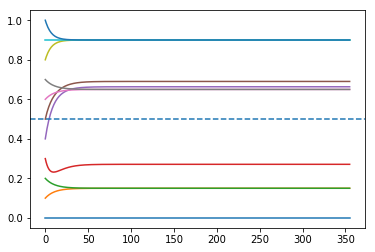

In [106]:
plt.plot(belief_history)
plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.show()

In [99]:
i = 0.5
inf = np.array([
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0],
    [0, 0, i, i, 0, 0, 0, 0, 0, 0],
    [0, i, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, i, 0, 0, 0, 0],
    [0, 0, 0, i, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, i, 0, 0, 0, i, i],
    [0, 0, 0, 0, i, 0, 0, i, 0, 0],
    [0, 0, 0, 0, i, 0, i, 0, 0, 0],
    [0, 0, 0, 0, 0, i, 0, 0, 0, i],
    [0, 0, 0, 0, 0, i, 0, 0, i, 0]
])
pol_history, belief_history, _ = plr.Simulation(plr.build_belief(plr.Belief.UNIFORM, len(inf)), inf).run()

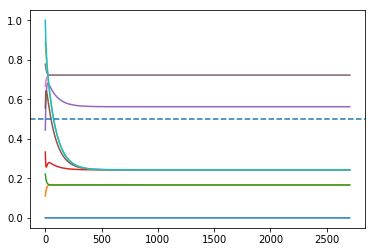

In [100]:
plt.plot(belief_history)
plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.show()

In [5]:
i = 0.5
inf = np.array([
    [0, i, 0, 0, 0, 0],
    [0, 0, i, 0, 0, 0],
    [0, 0, 0, i, 0, 0],
    [0, 0, 0, 0, i, 0],
    [0, 0, 0, 0, 0, i],
    [i, 0, 0, 0, 0, 0],
])
pol_history, belief_history, _ = plr.Simulation(plr.build_belief(plr.Belief.UNIFORM, len(inf)), inf).run()

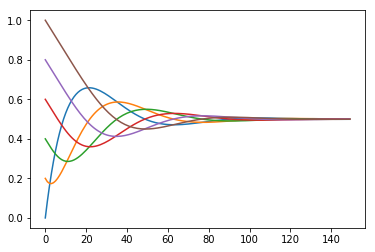

In [10]:
plt.plot(belief_history[:150])
# plt.axhline(np.mean(belief_history[0]), linestyle="dashed")
plt.show()